<a href="https://colab.research.google.com/github/EUNICE-OKUMU/-personal-journey/blob/main/Student_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Enroll model accuracy: 1.00
Enroll model F1-score: 1.00
Graduate model accuracy: 0.50
Graduate model F1-score: 0.67


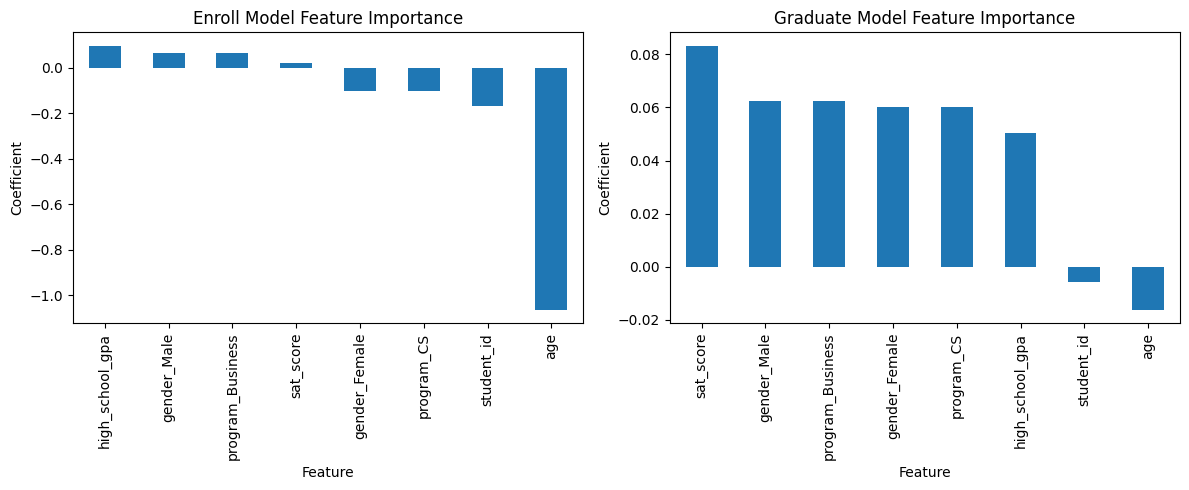

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Load the data into a Pandas DataFrame
df = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [18, 19, 20, 21, 18, 19, 20, 21, 19, 20],
    'high_school_gpa': [3.8, 3.5, 3.2, 2.9, 4.0, 3.7, 3.1, 2.8, 3.9, 3.4],
    'sat_score': [1400, 1200, 1100, 1050, 1450, 1300, 1080, 1000, 1400, 1150],
    'program': ['CS', 'Business', 'CS', 'Business', 'CS', 'Business', 'CS', 'Business', 'CS', 'Business'],
    'enrolled': [1, 1, 1, 0, 1, 1, 0, 0, 1, 1],
    'graduated': [1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
})

# Encode categorical variables
df = pd.get_dummies(df, columns=['gender', 'program'])

# Split the data into training and testing sets
X = df.drop(['enrolled', 'graduated'], axis=1)
y_enrolled = df['enrolled']
y_graduated = df['graduated']

X_train, X_test, y_train_enrolled, y_test_enrolled, y_train_graduated, y_test_graduated = train_test_split(X, y_enrolled, y_graduated, test_size=0.2, random_state=42)

# Train the logistic regression models
enroll_model = LogisticRegression()
enroll_model.fit(X_train, y_train_enrolled)

graduate_model = LogisticRegression()
graduate_model.fit(X_train, y_train_graduated)

# Evaluate the models
y_pred_enrolled = enroll_model.predict(X_test)
enroll_accuracy = accuracy_score(y_test_enrolled, y_pred_enrolled)
enroll_f1 = f1_score(y_test_enrolled, y_pred_enrolled)
print(f"Enroll model accuracy: {enroll_accuracy:.2f}")
print(f"Enroll model F1-score: {enroll_f1:.2f}")

y_pred_graduated = graduate_model.predict(X_test)
graduate_accuracy = accuracy_score(y_test_graduated, y_pred_graduated)
graduate_f1 = f1_score(y_test_graduated, y_pred_graduated)
print(f"Graduate model accuracy: {graduate_accuracy:.2f}")
print(f"Graduate model F1-score: {graduate_f1:.2f}")

# Analyze feature importance
enroll_coef = pd.Series(enroll_model.coef_[0], index=X.columns).sort_values(ascending=False)
graduate_coef = pd.Series(graduate_model.coef_[0], index=X.columns).sort_values(ascending=False)

# Create a graph to visualize feature importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

enroll_coef.plot(kind='bar', ax=ax1)
ax1.set_title('Enroll Model Feature Importance')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Coefficient')

graduate_coef.plot(kind='bar', ax=ax2)
ax2.set_title('Graduate Model Feature Importance')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Coefficient')

plt.tight_layout()
plt.show()